# City Happiness Index - Composite Indicator Project

In [ ]:
import pandas as pd

df = pd.read_csv(r"Expanded_Happiness_Index_Data.csv")
df.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Cost_of_Living_Index,Healthcare_Index,Environmental_Quality_Index,Health_Wellness_Index,Mobility_Comfort_Index,Composite_Happiness_Index
0,Auckland,January,2030,50.465937,Low,80.460279,42.041035,111.877191,96.157414,2.737814,0.000000,2.965485,1.836497
1,Auckland,February,2030,57.983992,Low,78.751371,40.643173,107.060736,95.118569,4.034636,0.000000,0.000000,1.613854
2,Auckland,March,2030,60.331442,Low,73.598909,41.068947,112.020024,96.376521,0.000000,1.954242,4.457555,1.798374
3,Auckland,April,2030,56.280849,Low,74.997689,41.209624,110.785413,97.668530,3.534505,0.000000,0.000000,1.413802
4,Auckland,May,2030,61.786558,Low,85.109873,38.019317,110.363012,98.822324,0.965483,3.508845,0.172656,1.657453


## Step 1: Data Cleaning and Imputation

In [ ]:
# Check for missing values
df.isnull().sum()

City                           0
Month                          0
Year                           0
Decibel_Level                  0
Traffic_Density                0
Green_Space_Area               0
Air_Quality_Index              0
Cost_of_Living_Index           0
Healthcare_Index               0
Environmental_Quality_Index    0
Health_Wellness_Index          0
Mobility_Comfort_Index         0
Composite_Happiness_Index      0
dtype: int64

## Step 2: Multivariate Analysis

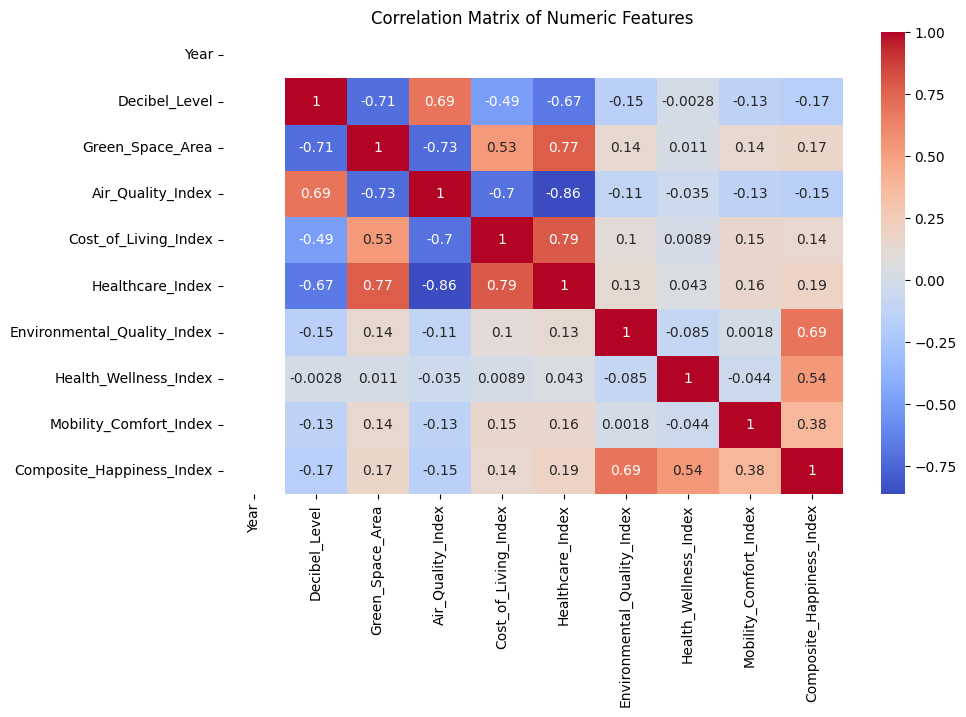

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

## Step 3: Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_cols = ['Air_Quality_Index', 'Decibel_Level', 'Green_Space_Area', 'Cost_of_Living_Index', 'Healthcare_Index']
df[[col + '_Norm' for col in normalized_cols]] = scaler.fit_transform(df[normalized_cols])
df.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Cost_of_Living_Index,Healthcare_Index,Environmental_Quality_Index,Health_Wellness_Index,Mobility_Comfort_Index,Composite_Happiness_Index,Air_Quality_Index_Norm,Decibel_Level_Norm,Green_Space_Area_Norm,Cost_of_Living_Index_Norm,Healthcare_Index_Norm
0,Auckland,January,2030,50.465937,Low,80.460279,42.041035,111.877191,96.157414,2.737814,0.000000,2.965485,1.836497,0.090193,0.150577,0.900887,0.794806,0.845217
1,Auckland,February,2030,57.983992,Low,78.751371,40.643173,107.060736,95.118569,4.034636,0.000000,0.000000,1.613854,0.083156,0.300407,0.881753,0.746024,0.830055
2,Auckland,March,2030,60.331442,Low,73.598909,41.068947,112.020024,96.376521,0.000000,1.954242,4.457555,1.798374,0.085300,0.347191,0.824062,0.796253,0.848414
3,Auckland,April,2030,56.280849,Low,74.997689,41.209624,110.785413,97.668530,3.534505,0.000000,0.000000,1.413802,0.086008,0.266465,0.839724,0.783748,0.867271
4,Auckland,May,2030,61.786558,Low,85.109873,38.019317,110.363012,98.822324,0.965483,3.508845,0.172656,1.657453,0.069948,0.376190,0.952947,0.779470,0.884110


## Step 4: Weighting and Aggregation

In [ ]:
# Used provided sub-indices and create final composite index
df['Composite_Happiness_Index'] = (
    0.4 * df['Environmental_Quality_Index'] +
    0.35 * df['Health_Wellness_Index'] +
    0.25 * df['Mobility_Comfort_Index']
)
df[['City', 'Composite_Happiness_Index']].sort_values(by='Composite_Happiness_Index', ascending=False).head(10)

,City,Composite_Happiness_Index
261,Vienna,3.783236
573,Wellington,3.607431
171,Oslo,3.544929
256,Vienna,3.372604
136,Lisbon,3.251533
36,Denver,3.243002
469,Ottawa,3.174471
295,Yerevan,3.165678
547,Ulaanbaatar,3.117675
367,Florence,3.116303


## Step 5: Cluster Analysis

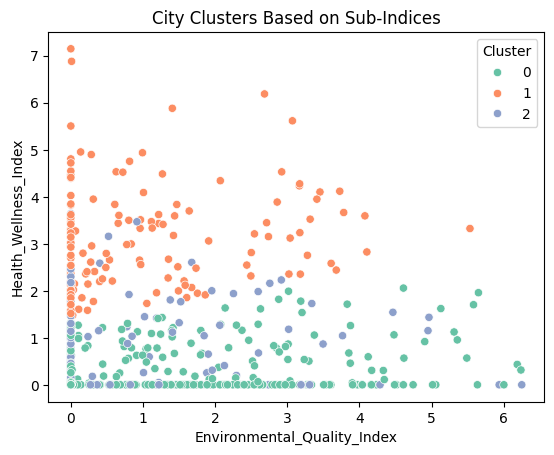

In [ ]:
from sklearn.cluster import KMeans

features = ['Environmental_Quality_Index', 'Health_Wellness_Index', 'Mobility_Comfort_Index']
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# Visualize clusters
sns.scatterplot(data=df, x='Environmental_Quality_Index', y='Health_Wellness_Index', hue='Cluster', palette='Set2')
plt.title("City Clusters Based on Sub-Indices")
plt.show()

## Step 6: Visualisation of Composite Index

C:\Users\SEJAL\AppData\Local\Temp\ipykernel_36920\3009719368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Composite_Happiness_Index', palette='viridis')


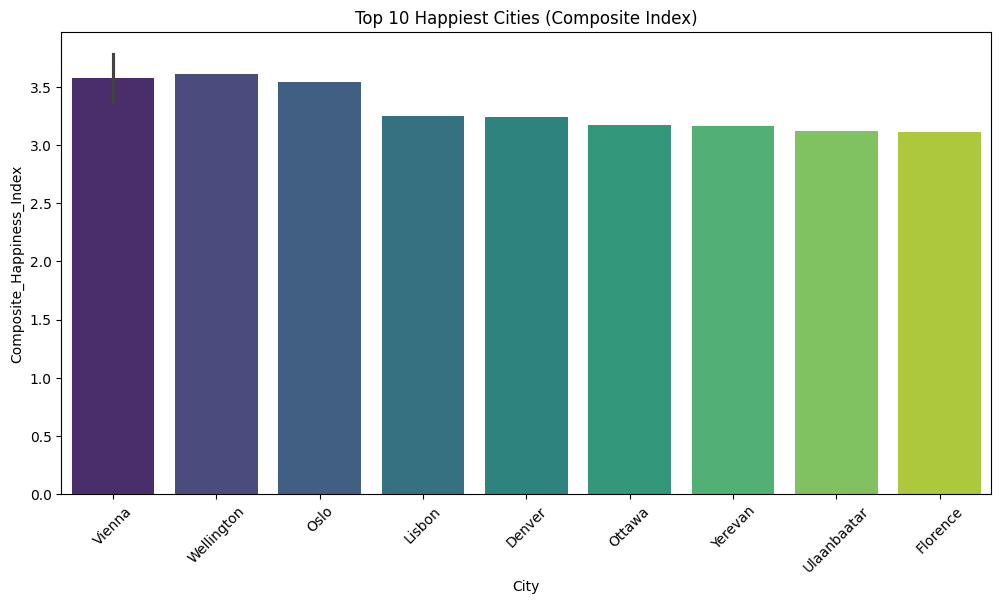

In [ ]:
# Bar plot of top 10 happiest cities
top_cities = df.sort_values(by='Composite_Happiness_Index', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Composite_Happiness_Index', palette='viridis')
plt.title("Top 10 Happiest Cities (Composite Index)")
plt.xticks(rotation=45)
plt.show()

## Step 7: Distribution of Sub-Indices

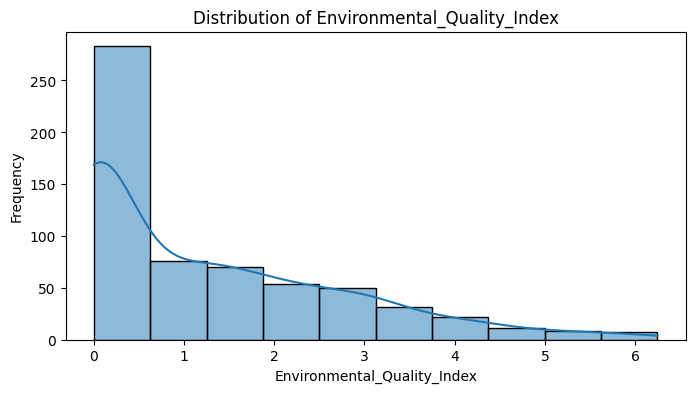

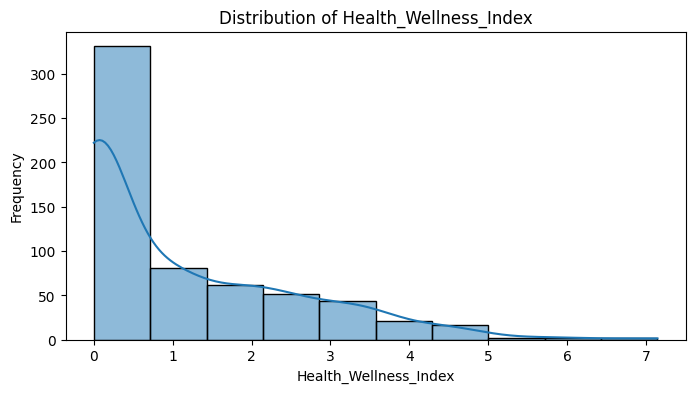

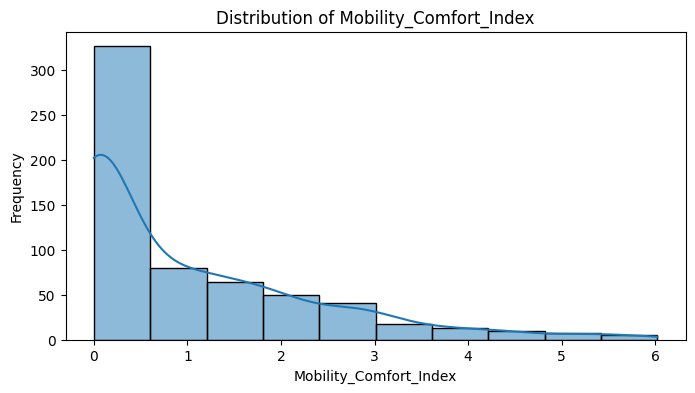

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of each sub-index
sub_indices = ['Environmental_Quality_Index', 'Health_Wellness_Index', 'Mobility_Comfort_Index']
for col in sub_indices:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Step 8: Composite Index by Region (if Region Column Available)

In [ ]:
if 'Region' in df.columns:
    region_avg = df.groupby('Region')['Composite_Happiness_Index'].mean().sort_values(ascending=False)
    region_avg.plot(kind='bar', figsize=(10, 6), title='Average Composite Index by Region')
    plt.ylabel('Composite Happiness Index')
    plt.show()
else:
    print("Region column not available in dataset.")

Region column not available in dataset.


## Step 9: Pairplot for Sub-Indices

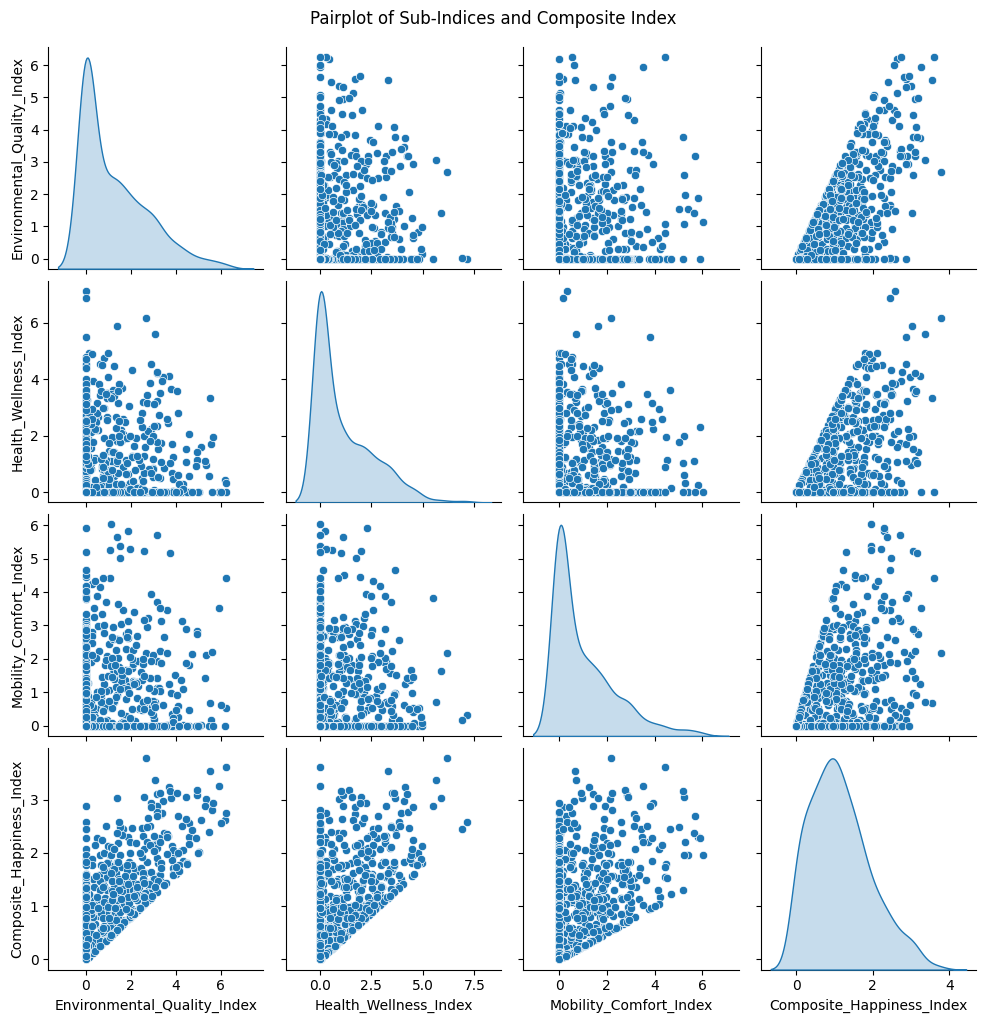

In [ ]:
# Pairplot for visual relationship
sns.pairplot(df[['Environmental_Quality_Index', 'Health_Wellness_Index', 'Mobility_Comfort_Index', 'Composite_Happiness_Index']], diag_kind='kde')
plt.suptitle('Pairplot of Sub-Indices and Composite Index', y=1.02)
plt.show()


## Step 10: Save Cleaned and Processed Dataset

In [11]:
import os
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)
df.to_csv(os.path.join(output_dir, 'Final_Happiness_Index_Data_Processed.csv'), index=False)
print('Dataset saved to output/Final_Happiness_Index_Data_Processed.csv')

Dataset saved to output/Final_Happiness_Index_Data_Processed.csv


## Step 11: Composite Index Over Time for Selected Cities

C:\Users\SEJAL\AppData\Local\Temp\ipykernel_36920\3645408540.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))


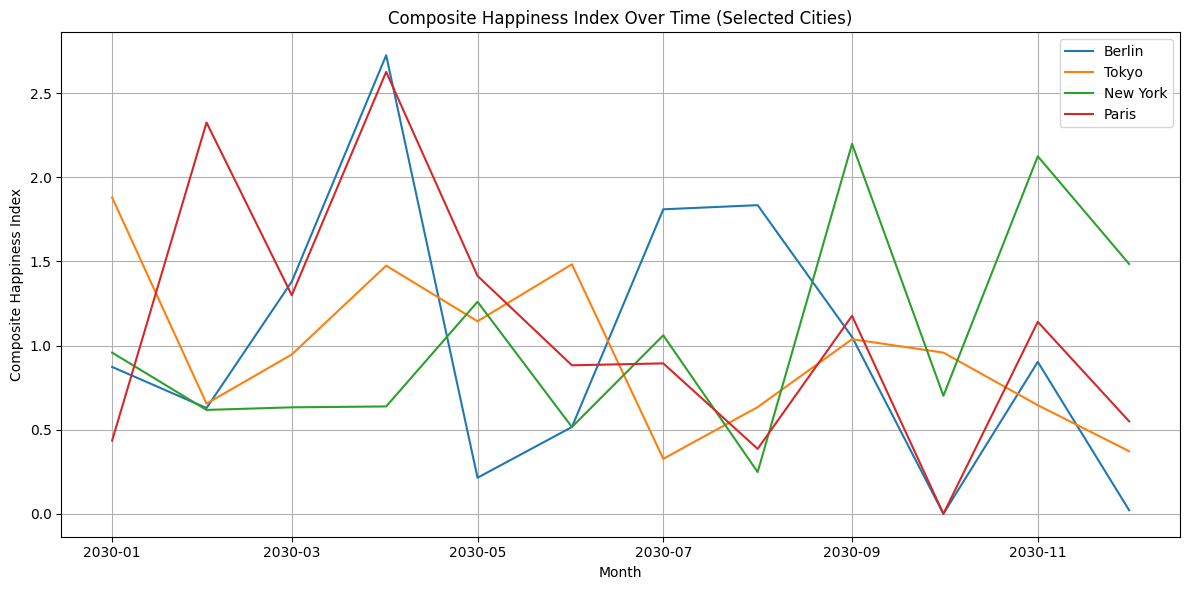

In [ ]:
# Line plot of Composite Index over time for a few cities
selected_cities = ['Berlin', 'Tokyo', 'New York', 'Paris']
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
plt.figure(figsize=(12, 6))
for city in selected_cities:
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Composite_Happiness_Index'], label=city)

plt.title("Composite Happiness Index Over Time (Selected Cities)")
plt.xlabel("Month")
plt.ylabel("Composite Happiness Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 12: Heatmap of City vs Month (Composite Index)

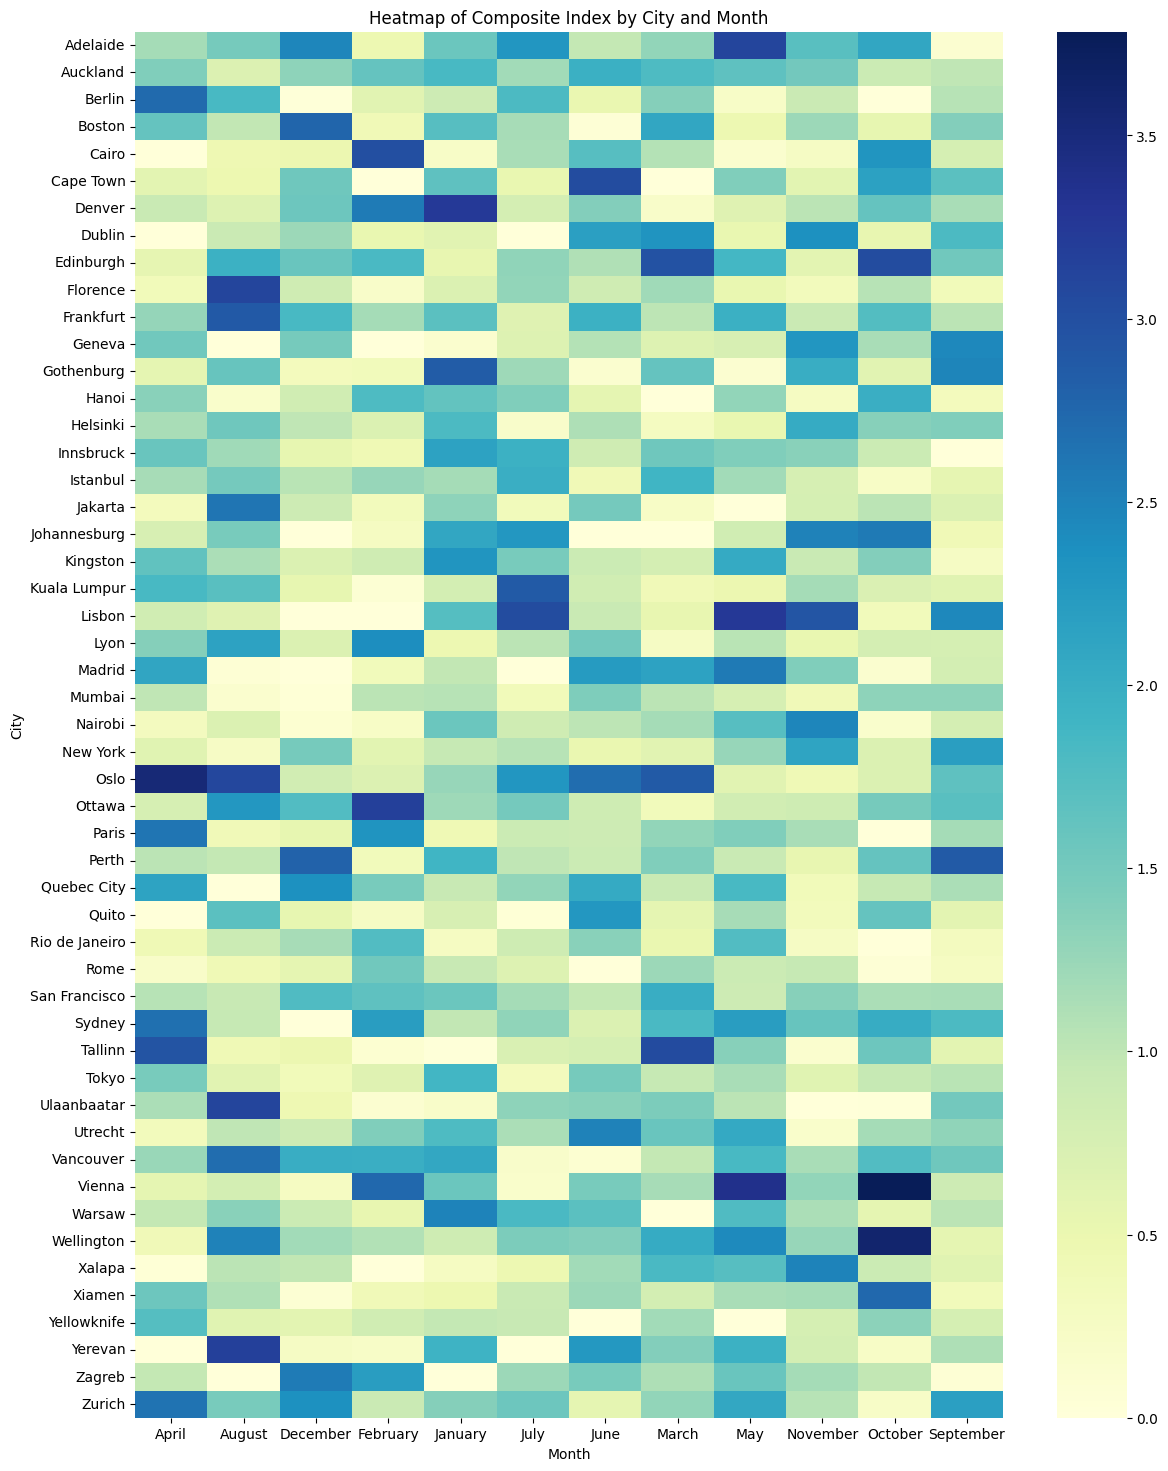

In [ ]:
# Pivot table and heatmap
pivot = df.pivot_table(index='City', columns='Month', values='Composite_Happiness_Index')
plt.figure(figsize=(14, 18))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title("Heatmap of Composite Index by City and Month")
plt.xlabel("Month")
plt.ylabel("City")
plt.show()

## Step 13: Boxplot Comparison of Sub-Indices

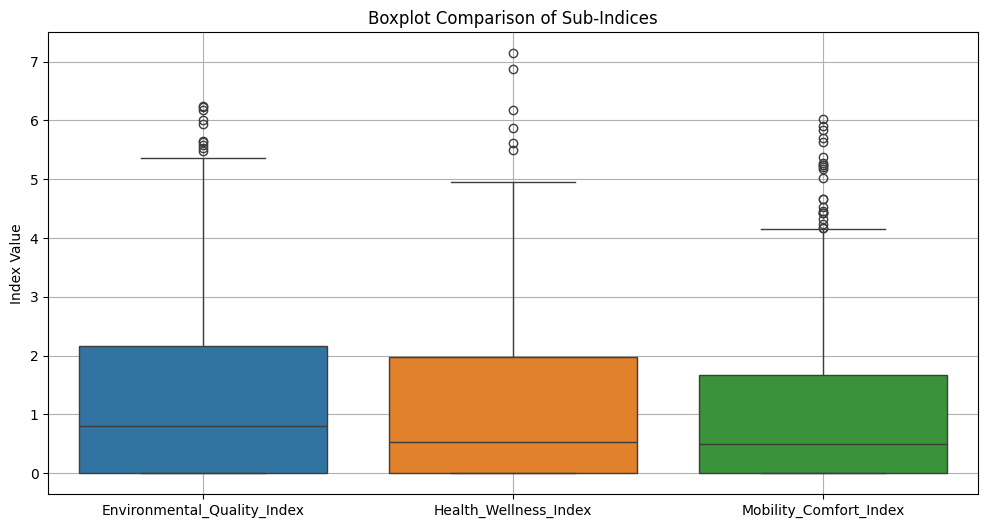

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Environmental_Quality_Index', 'Health_Wellness_Index', 'Mobility_Comfort_Index']])
plt.title("Boxplot Comparison of Sub-Indices")
plt.ylabel("Index Value")
plt.grid(True)
plt.show()

## Step 14: Scatterplot of Composite Index vs Air Quality

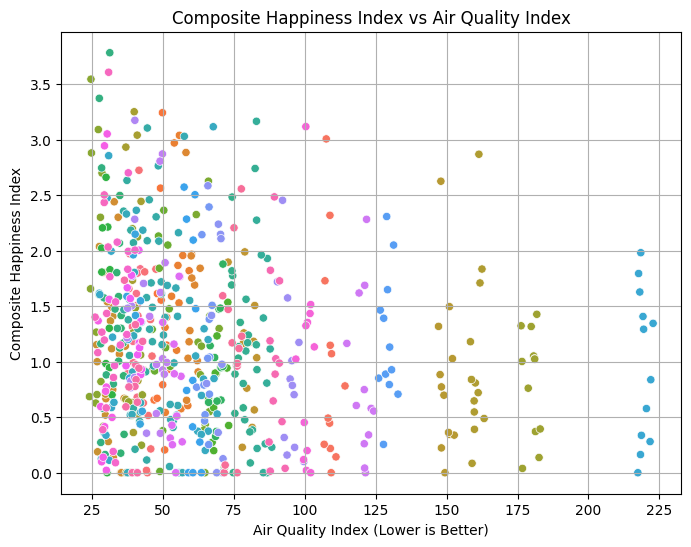

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Air_Quality_Index', y='Composite_Happiness_Index', hue='City', legend=False)
plt.title("Composite Happiness Index vs Air Quality Index")
plt.xlabel("Air Quality Index (Lower is Better)")
plt.ylabel("Composite Happiness Index")
plt.grid(True)
plt.show()

## Step 15: Comparison of Top and Bottom Cities by Composite Index

C:\Users\SEJAL\AppData\Local\Temp\ipykernel_36920\74910976.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=axes[0], palette='Greens_r')
C:\Users\SEJAL\AppData\Local\Temp\ipykernel_36920\74910976.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10.values, y=bottom_10.index, ax=axes[1], palette='Reds_r')


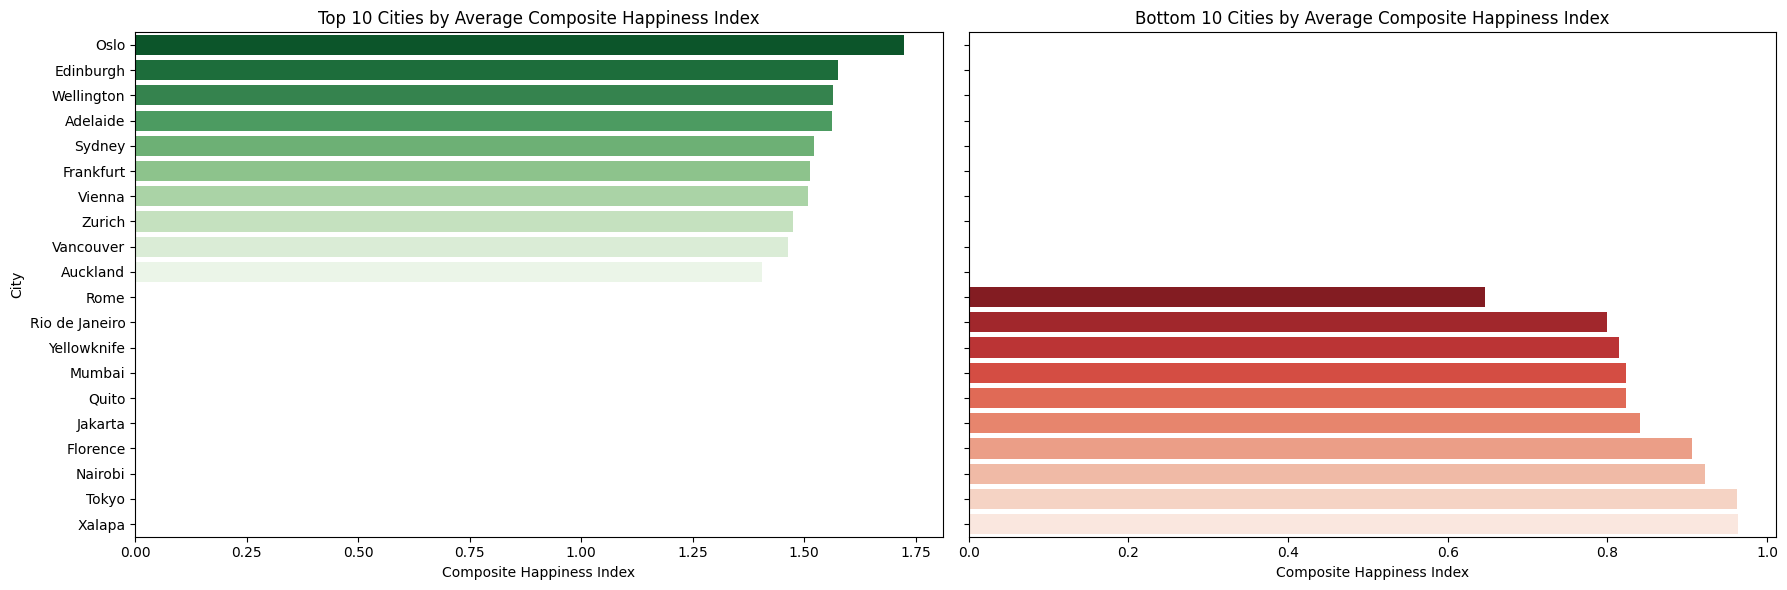

In [ ]:
# Top 10 cities
top_10 = df.groupby('City')['Composite_Happiness_Index'].mean().sort_values(ascending=False).head(10)

# Bottom 10 cities
bottom_10 = df.groupby('City')['Composite_Happiness_Index'].mean().sort_values().head(10)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.barplot(x=top_10.values, y=top_10.index, ax=axes[0], palette='Greens_r')
axes[0].set_title("Top 10 Cities by Average Composite Happiness Index")
axes[0].set_xlabel("Composite Happiness Index")

sns.barplot(x=bottom_10.values, y=bottom_10.index, ax=axes[1], palette='Reds_r')
axes[1].set_title("Bottom 10 Cities by Average Composite Happiness Index")
axes[1].set_xlabel("Composite Happiness Index")

plt.tight_layout()
plt.show()

## Step 16: Correlation of Sub-Indices with Composite Index

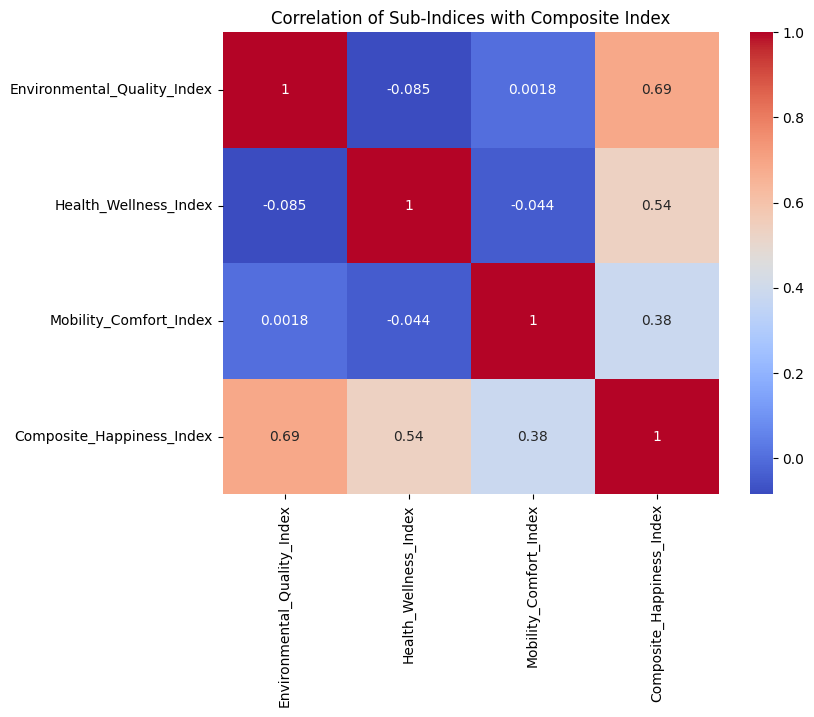

In [ ]:
correlation = df[[
    'Environmental_Quality_Index', 
    'Health_Wellness_Index', 
    'Mobility_Comfort_Index', 
    'Composite_Happiness_Index'
]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation of Sub-Indices with Composite Index")
plt.show()

## Step 17: Average Sub-Indices for Top vs Bottom Cities

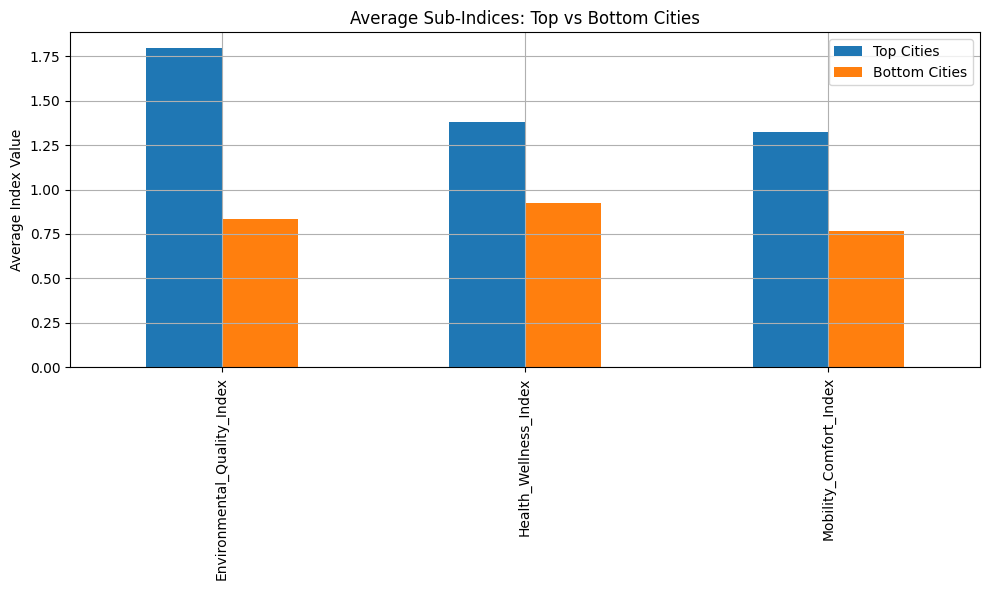

In [ ]:
# Select top and bottom cities
top_cities = top_10.index.tolist()
bottom_cities = bottom_10.index.tolist()

# Computed average sub-indices
avg_top = df[df['City'].isin(top_cities)][['Environmental_Quality_Index', 'Health_Wellness_Index', 'Mobility_Comfort_Index']].mean()
avg_bottom = df[df['City'].isin(bottom_cities)][['Environmental_Quality_Index', 'Health_Wellness_Index', 'Mobility_Comfort_Index']].mean()

# Combined into one DataFrame
comparison_df = pd.DataFrame({'Top Cities': avg_top, 'Bottom Cities': avg_bottom})
comparison_df.plot(kind='bar', figsize=(10, 6), title='Average Sub-Indices: Top vs Bottom Cities')
plt.ylabel("Average Index Value")
plt.grid(True)
plt.tight_layout()
plt.show()